# Benchmarks

In [99]:
#using Revise
#using BenchmarkTools
#using DataFrames
#using DataFramesMeta
#using Plots
#using Random
#using Unitful
#using Formatting
using Latexify

In [83]:
#include("../src/MyLL.jl")
#include("../src/MyV.jl")
#using .MyLL
#using .MyV

In [84]:
# just checking that the functions work properly  
k = 3
n = 10
sequence_vector = createrandomvector(k, n)
singlylinked_list = createrandom_sllist(n)
doublylinked_list = createrandom_dllist(n)

println(sequence_vector)
println("sll")
println(singlylinked_list)
for i in eachindex(sequence_vector)
    pushfirst!(singlylinked_list, popat!(singlylinked_list, sequence_vector[i]))
    println(singlylinked_list)
end

println(sequence_vector)
println("dll")
println(doublylinked_list)
for i in eachindex(sequence_vector)
    pushfirst!(doublylinked_list, popat!(doublylinked_list, sequence_vector[i]))
    println(doublylinked_list)
end

[3, 8, 7]
sll
90 75 96 22 41 38 30 22 54 19 
96 90 75 22 41 38 30 22 54 19 
22 96 90 75 22 41 38 30 54 19 
38 22 96 90 75 22 41 30 54 19 
[3, 8, 7]
dll
88 65 37 45 87 33 20 58 61 65 
37 88 65 45 87 33 20 58 61 65 
58 37 88 65 45 87 33 20 61 65 
33 58 37 88 65 45 87 20 61 65 


## Singly
### Comparing Singly Linked Lists to Vectors

1. Vary the size of a linked list and
   1. append it to a fixed size linked list
   2. prepend it to a fixed size linked list
2. Vary the size of a vector and
   1. append it to a fixed size vector i.e. copy both to a new vector
   2. prepend it to a fixed size vector i.e. copy both to a new vector
3. Stack operations, lists vs vectors (how?)

## Doubly
### Comparing Singly vs Doubly Linked Lists

* Keep a list of n elements and perform k remove and add operations
* Remove and add it back i.e. 
  * item = popat!(list, i) and then
  * pushfirst(list, item)!

create a vector with length k
v[i] = random number from 1:n

choose a random sequence of indexes from the vector

In [85]:
"""
    doublybench(n, k)

A benchmark function comparing singly to doubly linked lists. 
Returns a tuple containg 
- n nbr of elements in list, 
- k nbr of remove and insert operations (i.e. popat! and popfirst!),
- elapsed time in nanoseconds for the singly linked list,
- elapsed time in nanoseconds for the doubly linked list.

# Arguments
- `n`: Number of elements in list
- `k`: Number of operations 
"""
function doublybench(n, k)

    sequence_vector = createrandomvector(k, n)
    singlylinked_list = createrandom_sllist(n)
    doublylinked_list = createrandom_dllist(n)

    dll_time = @timed begin
        for i in eachindex(sequence_vector)
            pushfirst!(doublylinked_list, popat!(doublylinked_list, sequence_vector[i]))
        end
    end

    sll_time = @timed begin
        for i in eachindex(sequence_vector)
            pushfirst!(singlylinked_list, popat!(singlylinked_list, sequence_vector[i]))
        end
    end

    # return n, k, sll_time, dll_time # ns # when using @elapsed
    return n, k, sll_time[2], dll_time[2] # when using @timed
    # return n, k, minimum(sll_time).time, minimum(dll_time).time, minimum(sll_time).memory, minimum(dll_time).memory  # when using @timed
end

doublybench

In [86]:
k = 1000 # k operations

benchresults = Vector(undef, 0)
for n = 100000:100000:1000000
    push!(benchresults, doublybench(n, k))
end

In [87]:
for timedoperation ∈ benchresults
    println(timedoperation)
end

(100000, 1000, 0.168636068, 0.088874558)
(200000, 1000, 0.36340611, 0.194730777)
(300000, 1000, 0.654688093, 0.303569816)
(400000, 1000, 0.900377914, 0.493705288)
(500000, 1000, 1.282819455, 0.78998289)
(600000, 1000, 1.609806336, 0.815575966)
(700000, 1000, 2.274834134, 0.984406235)
(800000, 1000, 2.321007946, 1.357911222)
(900000, 1000, 2.62779157, 1.343835222)
(1000000, 1000, 3.152541657, 1.537721942)



## TODO: Data manipulation
* Ratio,  
  * Growth (within list)
  * Difference between lists
* Plots
  * do this with Plots.jl
* n and k in a more readable way
  * e.g. 10 000 instead of 10000 
* Manipulate time units. 
  * E.g. from ns to ms. Do this with Unitful


In [88]:
# Dataframe
df = DataFrame([[benchresults[k][kk] for k in 1:length(benchresults)] for kk in 1:length(benchresults[1])], [:n, :k, :SLL, :DLL])
# df = DataFrame([[benchresults[k][kk] for k in 1:length(benchresults)] for kk in 1:length(benchresults[1])], [:n, :k, :SLL, :DLL, :SLL_memory,:DLL_memory])

,n,k,SLL,DLL
,Int64,Int64,Float64,Float64
1,100000,1000,0.168636,0.0888746
2,200000,1000,0.363406,0.194731
3,300000,1000,0.654688,0.30357
4,400000,1000,0.900378,0.493705
5,500000,1000,1.28282,0.789983
6,600000,1000,1.60981,0.815576
7,700000,1000,2.27483,0.984406
8,800000,1000,2.32101,1.35791
9,900000,1000,2.62779,1.34384


In [89]:
# Data manipulation functions
f_ratio = (x, y) -> x/y

f_readable_n = x -> format(x, commas=false,autoscale=:finance,precision=0)

# u stands for unit and ns for nanoseconds
f_readable_time = x -> round(x, digits = 2) |> x -> x*u"ns" 

f_readable_ratio = x -> round(x, digits = 1)

#93 (generic function with 1 method)

In [90]:
# Testing that the formatting works properly
t_example = f_readable_time(456.45555)
n_example = f_readable_n(4564655)
r_example = f_readable_ratio(2.4555)
println(t_example)
println(n_example)
println(r_example)

456.46 ns
5m
2.5


In [91]:
# Data Transformations
df_trans = @transform(df, :Ratio = f_ratio.(:SLL,:DLL))
@transform!(df_trans, :Growth_Ratio_SLL = f_ratio.(:SLL, :SLL[1]))
@transform!(df_trans, :Growth_Ratio_DLL = f_ratio.(:DLL, :DLL[1]));

In [92]:
# Data formatting
df_trans[!,:n] = f_readable_n.(df_trans[:,:n])
df_trans[!,:k] = f_readable_n.(df_trans[:,:k])
df_trans[!,:SLL] = f_readable_time.(df_trans[:,:SLL])
df_trans[!,:DLL] = f_readable_time.(df_trans[:,:DLL])
df_trans[!,:Ratio] = f_readable_time.(df_trans[:,:Ratio])
df_trans[!,:Growth_Ratio_SLL] = f_readable_ratio.(df_trans[:,:Growth_Ratio_SLL])
df_trans[!,:Growth_Ratio_DLL] = f_readable_ratio.(df_trans[:,:Growth_Ratio_DLL]);

In [93]:
# Quick-check
df_trans

,n,k,SLL,DLL,Ratio,Growth_Ratio_SLL,Growth_Ratio_DLL
,String,String,Quantity…,Quantity…,Quantity…,Float64,Float64
1,100k,1k,0.17 ns,0.09 ns,1.9 ns,1.0,1.0
2,200k,1k,0.36 ns,0.19 ns,1.87 ns,2.2,2.2
3,300k,1k,0.65 ns,0.3 ns,2.16 ns,3.9,3.4
4,400k,1k,0.9 ns,0.49 ns,1.82 ns,5.3,5.6
5,500k,1k,1.28 ns,0.79 ns,1.62 ns,7.6,8.9
6,600k,1k,1.61 ns,0.82 ns,1.97 ns,9.5,9.2
7,700k,1k,2.27 ns,0.98 ns,2.31 ns,13.5,11.1
8,800k,1k,2.32 ns,1.36 ns,1.71 ns,13.8,15.3
9,900k,1k,2.63 ns,1.34 ns,1.96 ns,15.6,15.1


In [94]:
df_trans[:,:k][1]

"1k"

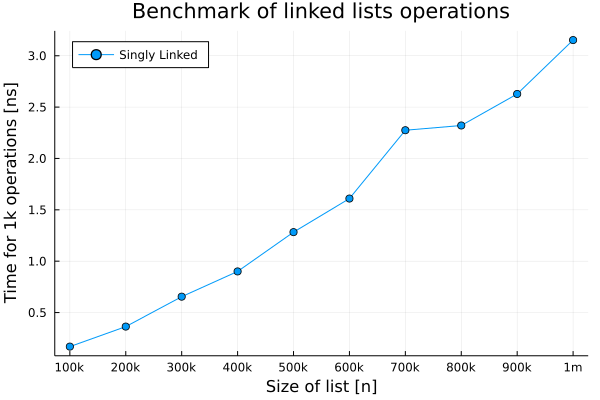

In [107]:
doubly_fig1 = plot(df_trans[:,:n], df[:,:SLL],
    xlabel = "Size of list [n]",
    ylabel = "Time for $(df_trans[:,:k][1]) operations [ns]",
    title = "Benchmark of linked lists operations",
    label = "Singly Linked",
    legend = :topleft,
    shape = :circle)

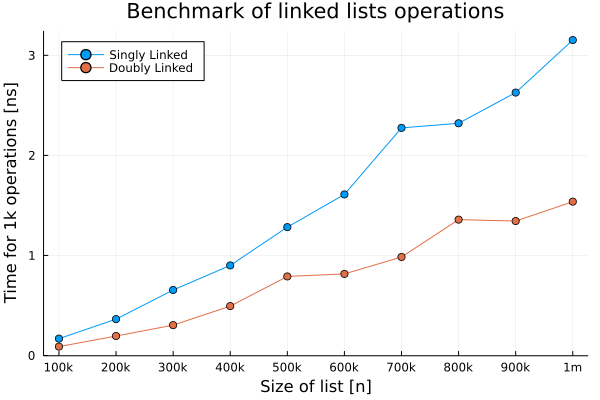

In [108]:

doubly_fig1 = plot!(df_trans[:,:n], df[:,:DLL],
    label = "Doubly Linked",
    legend = :topleft,
    shape = :circle)

In [109]:
filepath = pwd()
savefig(doubly_fig1,filepath*"/output/doubly_fig1v3.pdf")

In [102]:
latexify(df_trans, env=:tabular) |> print

\begin{tabular}{ccccccc}
$n$ & $k$ & $SLL$ & $DLL$ & $Ratio$ & $Growth_{Ratio\_SLL}$ & $Growth_{Ratio\_DLL}$\\
$100 \cdot k$ & $1 \cdot k$ & $0.17 ns$ & $0.09 ns$ & $1.9 ns$ & $1.0$ & $1.0$\\
$200 \cdot k$ & $1 \cdot k$ & $0.36 ns$ & $0.19 ns$ & $1.87 ns$ & $2.2$ & $2.2$\\
$300 \cdot k$ & $1 \cdot k$ & $0.65 ns$ & $0.3 ns$ & $2.16 ns$ & $3.9$ & $3.4$\\
$400 \cdot k$ & $1 \cdot k$ & $0.9 ns$ & $0.49 ns$ & $1.82 ns$ & $5.3$ & $5.6$\\
$500 \cdot k$ & $1 \cdot k$ & $1.28 ns$ & $0.79 ns$ & $1.62 ns$ & $7.6$ & $8.9$\\
$600 \cdot k$ & $1 \cdot k$ & $1.61 ns$ & $0.82 ns$ & $1.97 ns$ & $9.5$ & $9.2$\\
$700 \cdot k$ & $1 \cdot k$ & $2.27 ns$ & $0.98 ns$ & $2.31 ns$ & $13.5$ & $11.1$\\
$800 \cdot k$ & $1 \cdot k$ & $2.32 ns$ & $1.36 ns$ & $1.71 ns$ & $13.8$ & $15.3$\\
$900 \cdot k$ & $1 \cdot k$ & $2.63 ns$ & $1.34 ns$ & $1.96 ns$ & $15.6$ & $15.1$\\
$1 \cdot m$ & $1 \cdot k$ & $3.15 ns$ & $1.54 ns$ & $2.05 ns$ & $18.7$ & $17.3$\\
\end{tabular}
